# Automatic Essay Scoring (AES)

Automatic Essay Scoring (AES) é uma tarefa de machine learning que consistem em atribuir uma nota para redação de maneira automática.
No geral, diversas abordagens na literatura apresentaram resultados significativos na tentativa de realizar esse processo utilizando diversas técnicas e algoritmos focando em diferentes aspectos como analise da corretude gramatical, existência de estrutura retórica entre outras.

Essencialmente, AES consiste em duas principais abordagens, a primeira usa regressão para atribuir uma nota ao texto de entrada, enquanto a segunda tenta classificar a nota em um intervalo predeterminado e fixo, por exemplo, (e.g 0, 50, 100, 150, 200) . Além disso,  podemos ainda dividir as notas por rubricas, aspectos especificos do texto que são avaliados como, por exemplo, apenas a gramatica, ou apenas a argumentação do texto etc.

Nesse contexto, a correção automática de redações do ENEM, por exemplo, tem sido tema de diversos artigos da área que empregam uma diversidade de técnicas com esse fim. Um dos objetivos para isso é a redução do tempo de correção e do custo operacional para isso. Assim, várias artigos, diversas técnicas foram empregadas, tanto aquelas que buscam uma classificação holistica (classificação da nota final) como aquelas que buscam uma classificação por rúbrica (classificação de um aspecto especifico).


Dessa maneira, nesse trabalho, para fins de simplicidade, iremos aplicar técnicas de classificação da nota final de redações do enem. Utilizaremos para isso o conjunto de dados de redações do UOL que contém 4570 redações em diferentes assuntos. Para atribuir uma nota, iremos utilizar um conjunto de classificadores extraindo diversas características relacionadas as aspectos como legibilidade, coesão, coerência e outros para assim classificar a nota entre 0, 50, 100, 150 e 200.



In [1]:
!pip install -q aibox-nlp[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.4/427.4 kB 14.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.7/32.7 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.2/447.2 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 58.

## Carregando o Conjunto de Dados


Nessa etapa, carregamos o conjunto de dados utilizando a biblioteca aibox-nlp que conta com diversos conjuntos de dados relacionados redação do ENEM, bem como, pipelines para extração de caracteríticas (features em inglês).

In [2]:
from aibox.nlp.data.datasets import DatasetEssayBR, DatasetPortugueseNarrativeEssays

N_SAMPLE = 500
# === Essay-BR ===
ds = DatasetEssayBR(extended=False,
                    target_competence='score')
df_dataset = ds.to_frame().sample(n=N_SAMPLE)
df_dataset

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_md')


nlpbox: download datasets/essay-br.v1: 100%|██████████| 9.94M/9.94M [00:00<00:00, 24.2MB/s]


,text,target,C1,C2,C3,C4,C5,score,prompt
3738,"Para o ecritor Buckminster Fuller ""A humanida...",760,160,120,120,200,160,760,A cultura do cancelamento é um fenômeno em que...
3101,"No passado, quando os métodos contraceptivos n...",520,120,120,80,120,80,520,A gravidez na adolescência consiste na gravide...
1723,O massacre ocorrido nos presídios no Norte e N...,640,120,160,120,160,80,640,Esse é o cenário enfrentado por Estados das re...
3542,O psiquiatra e escritor brasileiro Augusto Cur...,760,160,160,120,160,160,760,O marketing de influência é uma abordagem de m...
4293,"O Esporte é muito importante na vida de todos,...",720,160,120,160,120,160,720,"""O homem moderno vem deixando de lado as práti..."
...,...,...,...,...,...,...,...,...,...
1047,O território brasileiro é marcado pela miscige...,600,120,120,120,120,120,600,"A questão não é opção religiosa, mas a liberda..."
3443,É vigente que o abuso de autoridade no Brasil ...,480,160,80,80,120,40,480,Abuso de poder ou abuso de autoridade é concei...
2614,Um corpo tem a tendncia de permanecer em movim...,560,80,120,120,120,120,560,"Entre 1996 e 2014, o número de jovens entre 12..."
719,A liberdade das pessoas que se manifestaram na...,240,120,120,0,0,0,240,"Recentemente, a chamada cracolândia da capital..."


<Axes: xlabel='target'>

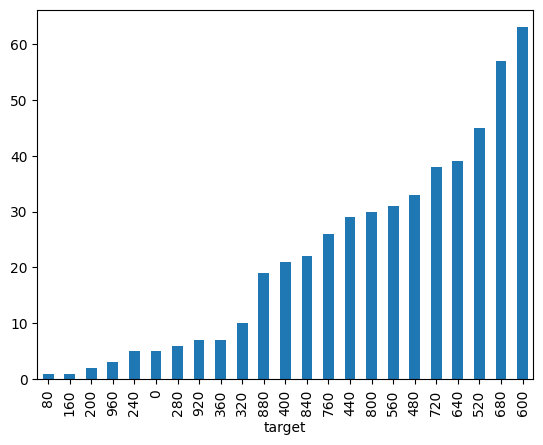

In [3]:
df_dataset.target.value_counts().sort_values().plot(kind="bar")

In [5]:
import numpy as np

count_values = df_dataset.target.value_counts()
low_counts =  count_values >= 6

filtered_df = df_dataset[np.isin(df_dataset.score, count_values[low_counts].index)]
filtered_df

,text,target,C1,C2,C3,C4,C5,score,prompt
3738,"Para o ecritor Buckminster Fuller ""A humanida...",760,160,120,120,200,160,760,A cultura do cancelamento é um fenômeno em que...
3101,"No passado, quando os métodos contraceptivos n...",520,120,120,80,120,80,520,A gravidez na adolescência consiste na gravide...
1723,O massacre ocorrido nos presídios no Norte e N...,640,120,160,120,160,80,640,Esse é o cenário enfrentado por Estados das re...
3542,O psiquiatra e escritor brasileiro Augusto Cur...,760,160,160,120,160,160,760,O marketing de influência é uma abordagem de m...
4293,"O Esporte é muito importante na vida de todos,...",720,160,120,160,120,160,720,"""O homem moderno vem deixando de lado as práti..."
...,...,...,...,...,...,...,...,...,...
4117,Famigerada obra de literatura -e que virou fil...,880,160,160,200,160,200,880,"O relator especial da ONU Juan E. Méndez, espe..."
1047,O território brasileiro é marcado pela miscige...,600,120,120,120,120,120,600,"A questão não é opção religiosa, mas a liberda..."
3443,É vigente que o abuso de autoridade no Brasil ...,480,160,80,80,120,40,480,Abuso de poder ou abuso de autoridade é concei...
2614,Um corpo tem a tendncia de permanecer em movim...,560,80,120,120,120,120,560,"Entre 1996 e 2014, o número de jovens entre 12..."


## Treinando o Modelo

### Extração de Características


Como abordado em diversos artigos, uma forma de realizar a classificação de redação é usando extração de características do texto.

In [8]:
import json

from aibox.nlp.factory import get_extractor

In [9]:
FEATURES_lIST = ['readabilityBR',
                  'regencyBR',
                  'syntacticComplexityBR',
                  'textualSimplicityBR']

TEXT_EXEMPLE = "O poeta modernista Oswald de Andrade relata, em \"Erro de Português\", que, sob um dia de chuva, o índio foi vestido pelo português - uma denúncia à aculturação sofrida pelos povos indígenas com a chegada dos europeus ao território brasileiro. Paralelamente, no Brasil atual, há a manutenção de práticas prejudiciais não só aos silvícolas, mas também aos demais povos e comunidades tradicionais, como os pescadores. Com efeito, atuam como desafios para a valorização desses grupos a educação deficiente acerca do tema e a ausência do desenvolvimento sustentável."

In [10]:
# === Obtendo um único extrator ===
readability_extractor = get_extractor(FEATURES_lIST)
extraction = readability_extractor.extract(TEXT_EXEMPLE)
features_dict = extraction.as_dict()
print( json.dumps(features_dict, indent=2, ensure_ascii=False))


nlpbox: download dictionary/biderman-words.v1: 100%|██████████| 22.4k/22.4k [00:00<00:00, 6.57MB/s]
nlpbox: download dictionary/morph-checker.v1: 100%|██████████| 1.32k/1.32k [00:00<00:00, 763kB/s]
nlpbox: download dictionary/nominal-regency.v1: 100%|██████████| 1.46k/1.46k [00:00<00:00, 611kB/s]
nlpbox: download dictionary/biderman-concrete-words.v1: 100%|██████████| 26.2k/26.2k [00:00<00:00, 6.90MB/s]

{
  "adapted_dalechall": 5.09875968992248,
  "adverbs_before_main_verb_ratio": 0.16666666666666666,
  "brunet_indice": 9.066469756208491,
  "clauses_per_sentence": 2.0,
  "coord_conj_ratio": 1.0,
  "coordinate_conjunctions_per_clauses": 0.5,
  "dialog_pron_ratio": 0,
  "easy_conj_ratio": 0.12790697674418605,
  "flesch_indice": 30.863914728682204,
  "gunning_fox_indice": 11.606201550387597,
  "hard_conj_ratio": 0.023255813953488372,
  "honore_statistics": 1373.4939003829327,
  "infinite_subordinate_clauses": 0.3333333333333333,
  "long_sentence_ratio": 1.0,
  "medium_long_sentence_ratio": 0.0,
  "medium_short_sentence_ratio": 0.0,
  "nominal_regency_score": 1.0,
  "passive_ratio": 0.3333333333333333,
  "readibility_indice": 18.04158914728682,
  "sentences_with_1_clauses": 2,
  "sentences_with_2_clauses": 0,
  "sentences_with_3_clauses": 0,
  "sentences_with_4_clauses": 1,
  "sentences_with_5_clauses": 0,
  "sentences_with_6_clauses": 0,
  "sentences_with_7_clauses": 0,
  "short_sentence

In [11]:
import numpy as np
extraction = [features.as_numpy().tolist()
                        for features in map(readability_extractor.extract, filtered_df["text"])]

X = np.array(extraction)
Y = filtered_df.target.to_numpy()

X[:5]

array([[5.07533073e+00, 5.00000000e-01, 1.12902822e+01, 3.00000000e+00,
        3.10344815e-01, 3.00000012e-01, 0.00000000e+00, 2.40282685e-01,
        4.67253418e+01, 1.14415550e+01, 1.76678449e-02, 1.00463446e+03,
        4.36363637e-01, 6.00000024e-01, 0.00000000e+00, 3.00000012e-01,
        1.00000000e+00, 2.00000003e-01, 1.61368542e+01, 4.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 4.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000001e-01, 0.00000000e+00,
        9.32633936e-01, 6.89655185e-01, 6.38973961e+01, 1.00000000e+00,
        2.00000000e+00],
       [4.87262535e+00, 8.09523821e-01, 1.10185232e+01, 2.09999990e+00,
        8.00000012e-01, 5.71428597e-01, 0.00000000e+00, 3.23770493e-01,
        4.37739182e+01, 9.89114761e+00, 2.45901644e-02, 9.07208130e+02,
        2.43243247e-01, 8.00000012e-01, 1.00000001e-01, 0.00000000e+00,
        1.00000000e+00, 4.76190485e-02, 1.56326227e+01, 5.00000000e+00,
        2.00000000e+00, 0.00000000e+00,

### Dividindo o Conjunto de Dados Train and Test






In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Separando os dados em treinamento(75%) e teste(25%)
sm = SMOTE(random_state=42, k_neighbors=2)
X_res, y_res = sm.fit_resample(X, Y) # Usando oversampling de classes minoritárias
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size = 0.25)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78fadea468c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


### Treinando com Modelos


Podemos treinar com o modelo caixa branca, neste caso, árvore de decisão. Objetivo é garantir a existência de um modelo baseline.
Além disso, completamos nossa análise com os modelos que são caixa preta e que precisão de uma análise de explicabilidade.

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

svc_clf = SVC(kernel="linear", C=0.025).fit(X_train, Y_train)
rf_clf = RandomForestClassifier(max_depth=3, random_state=0).fit(X_train, Y_train)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
knn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)


In [14]:
clf_list = [svc_clf,rf_clf,gb_clf,knn_clf ]

In [15]:
from sklearn import metrics

report = {}
for clf in clf_list:
    score = metrics.f1_score(Y_test, clf.predict(X_test), average="macro")
    report[clf.__class__.__name__] = score

In [16]:
import pandas as pd


pd.DataFrame.from_dict(report, orient='index', columns=["f1-score"])

,f1-score
SVC,0.303990
RandomForestClassifier,0.371344
GradientBoostingClassifier,0.273107
KNeighborsClassifier,0.438868


### Analise dos Resultados

Por meio dos resultados podemos ver que os modelos tem resultados comparativos ruins entre si.

## Explicabilidade

### Global Surrogates

Global Surrogates é uma forma de explicabilidade que usa um modelo caixa branca, explicável para entender as saídas de um modelo caixa preta (não explicável).
É uma tentativa de obter uma explicação geral sobre o resultado final do modelo ao invés de explicar apenas uma saída.

No nosso caso, iremos utilizar o modelo Decision tree, caixa branca, para tentar explicar as saídas do modelo caixa preta.

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)

### Permutation Feature Importance




In [18]:
from sklearn.inspection import permutation_importance
import pandas as pd

def calculate_pfi(model, x_test, y_test, feature_names):

    r = permutation_importance(model, x_test, y_test,
                            n_repeats=30,
                            random_state=0)

    features_df = []
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:

            print(f"{feature_names[i]:<8} "
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")
            features_df.append({
                "feature_names": feature_names[i],
                "mean": r.importances_mean[i],
                "std": r.importances_std[i]
            })

    return pd.DataFrame(features_df).set_index("feature_names")

Calculando Feature importance for model:  SVC
flesch_indice 0.156 +/- 0.020
token_var_idx 0.126 +/- 0.018
honore_statistics 0.121 +/- 0.023
words_before_main_verb 0.071 +/- 0.011
readibility_indice 0.067 +/- 0.014
sentences_with_2_clauses 0.042 +/- 0.015
gunning_fox_indice 0.035 +/- 0.014
sentences_with_1_clauses 0.028 +/- 0.014
nominal_regency_score 0.010 +/- 0.002
coordinate_conjunctions_per_clauses 0.008 +/- 0.003
                                         mean       std
feature_names                                          
flesch_indice                        0.155846  0.019807
token_var_idx                        0.126368  0.017784
honore_statistics                    0.120647  0.022826
words_before_main_verb               0.070647  0.011233
readibility_indice                   0.067164  0.014419
sentences_with_2_clauses             0.041667  0.014928
gunning_fox_indice                   0.034950  0.014044
sentences_with_1_clauses             0.028483  0.014208
nominal_regency_sco

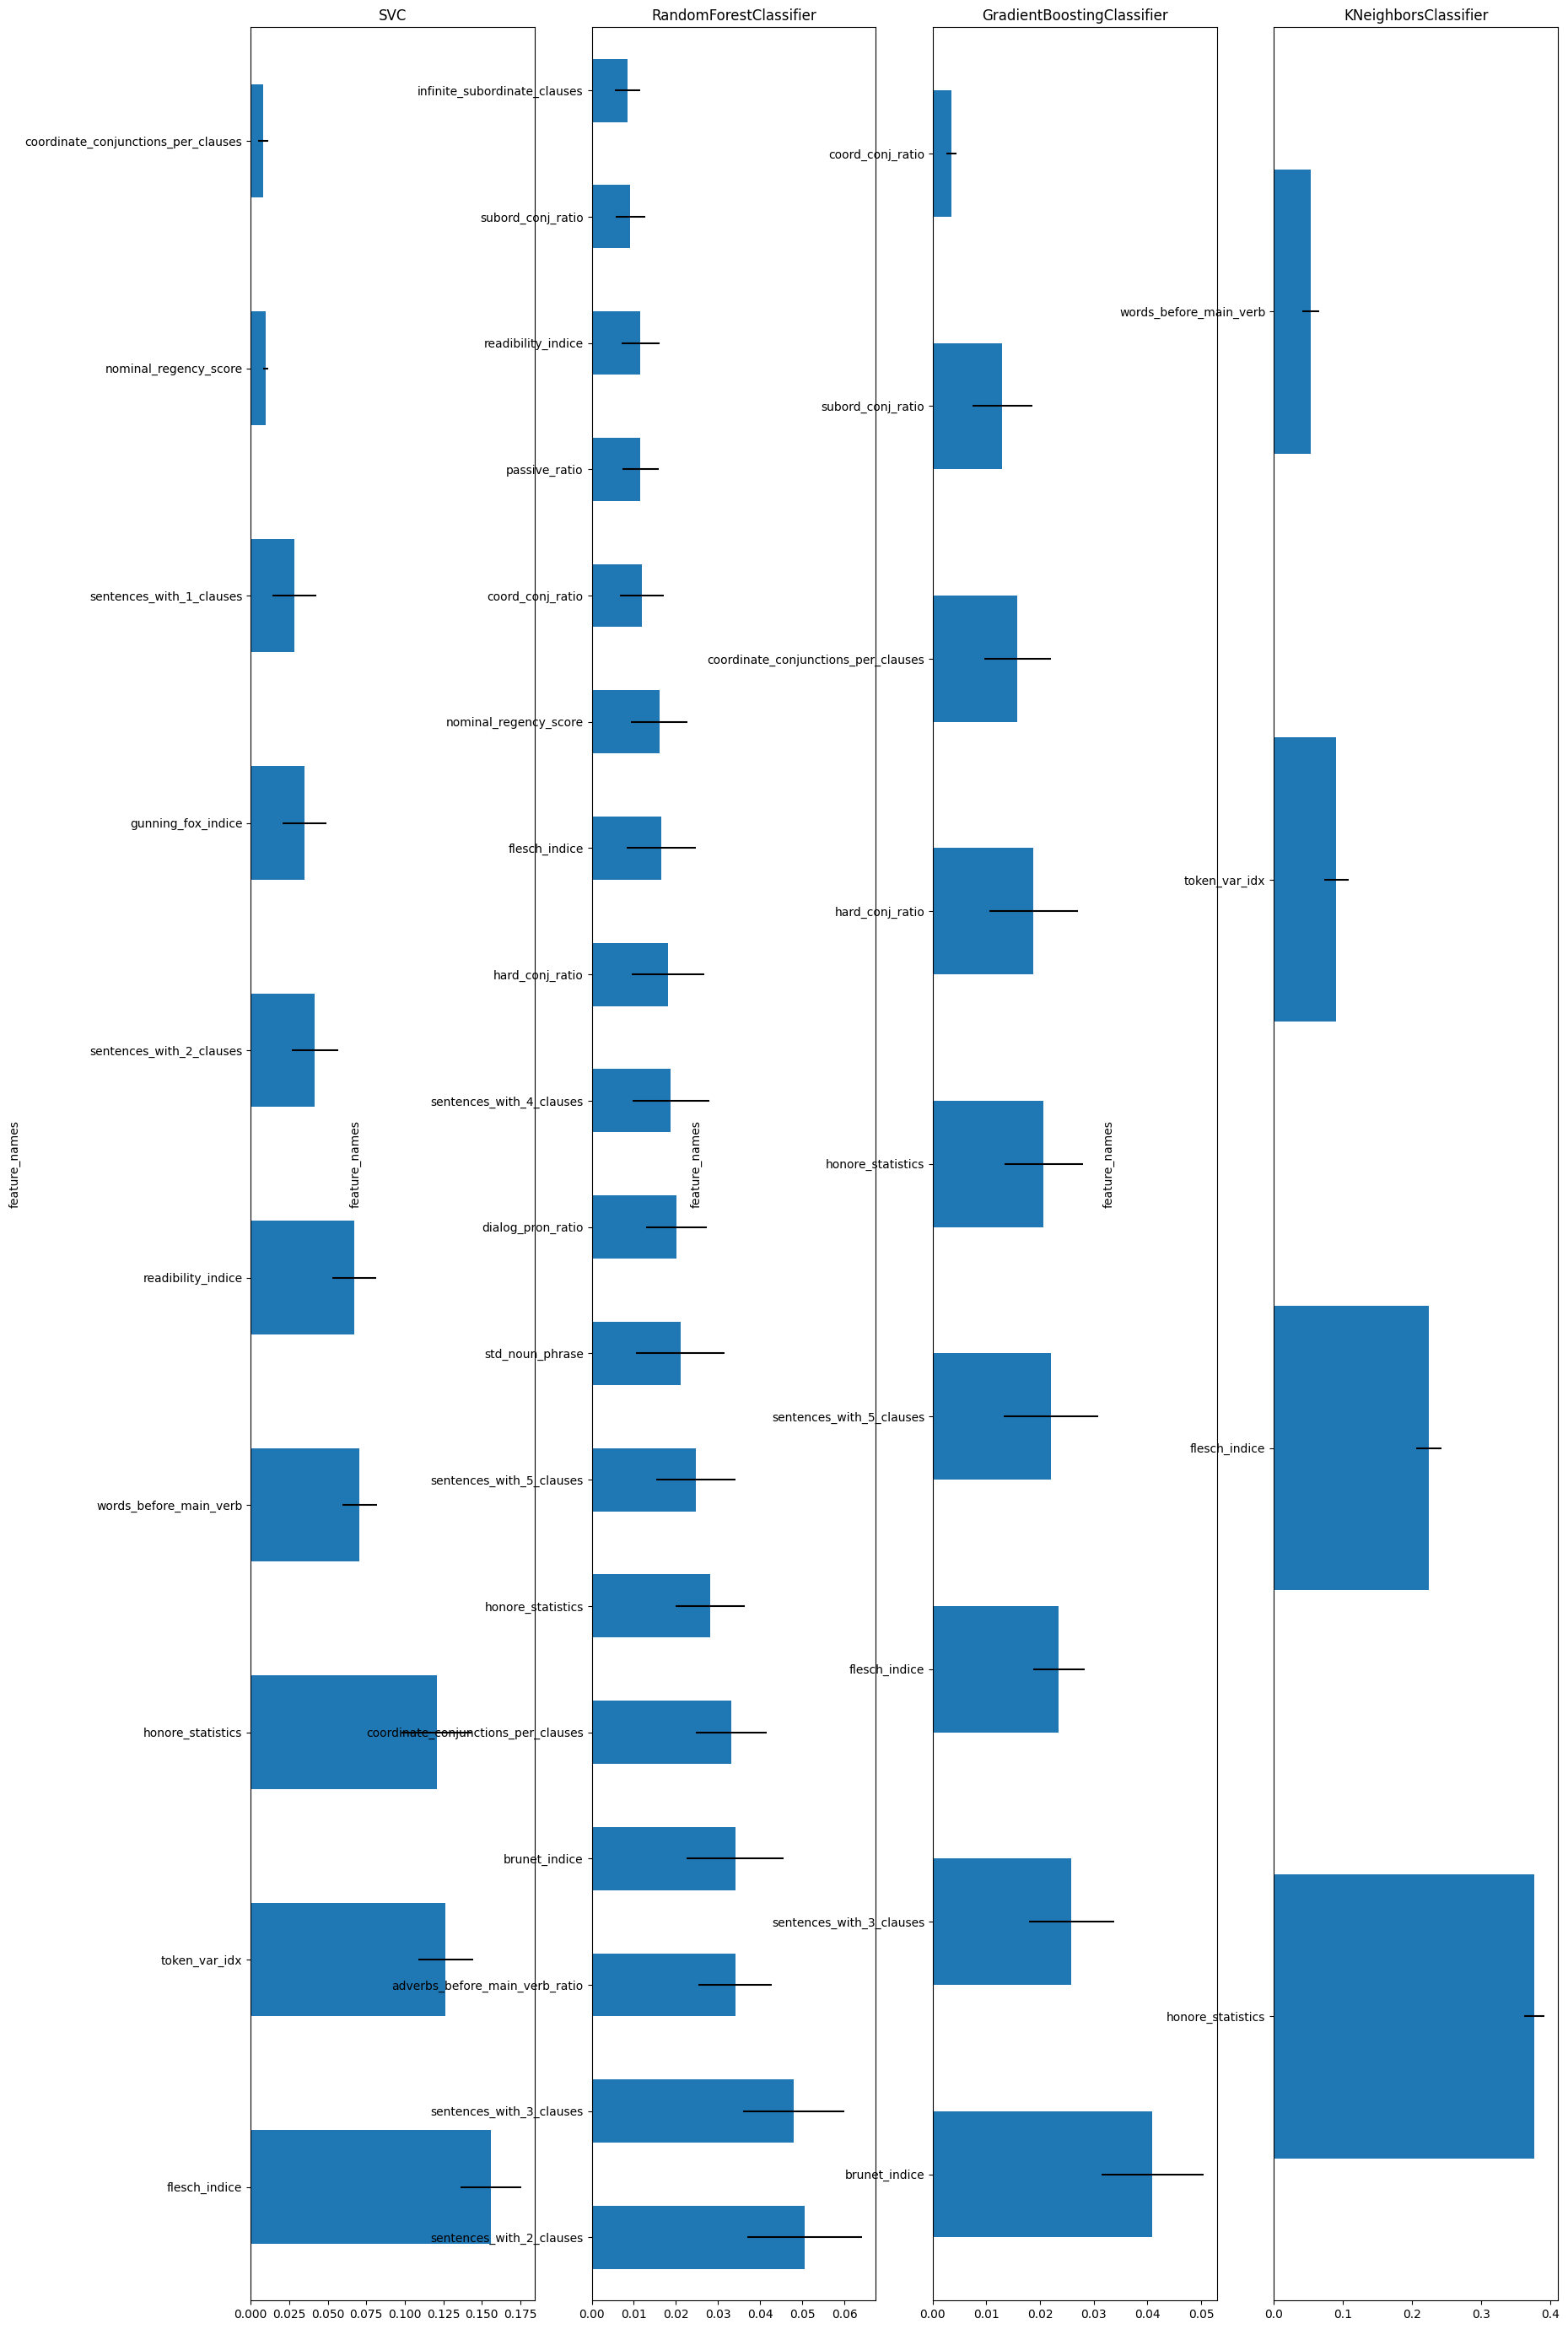

In [19]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(clf_list), figsize=(20,35))
feature_names = list(features_dict.keys())
for i, ml_class in enumerate(clf_list):

    ml_name = ml_class.__class__.__name__
    print("Calculando Feature importance for model: ", ml_name)
    df = calculate_pfi(ml_class, X_test, Y_test, feature_names)
    print(df)
    df.plot(kind = "barh", y = "mean", legend = False,
            title = ml_name, xerr = "std", ax=axes[i] if len(clf_list) > 1 else axes)
    print()
    print("-"*10)